In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from sklearn.preprocessing import scale

from sklearn.manifold import TSNE,MDS
import kmapper as km
import sklearn
from tqdm import tqdm
import networkx as nx 
import pandas as pd
THREE_SIGMA_THRESHOLD = 14.16

In [2]:
big_matrix = np.load("cpQM_ctG_ctp.npz")
big_matrix = np.column_stack([big_matrix["cpQM"],big_matrix["ctG"],big_matrix["ctp"],big_matrix["2dNLL"]])


In [3]:
the_df = pd.DataFrame(data=big_matrix,index=range(big_matrix.shape[0]),columns=["var1","var2","var3","func"])

In [4]:
display(the_df)

,var1,var2,var3,func
0,-10.0,-2.0,-30.000000,66.587959
1,-10.0,-2.0,-29.698997,66.183815
2,-10.0,-2.0,-29.397993,65.798569
3,-10.0,-2.0,-29.096990,65.459511
4,-10.0,-2.0,-28.795987,65.104317
...,...,...,...,...
26999995,30.0,1.5,58.795987,58.213650
26999996,30.0,1.5,59.096990,58.796383
26999997,30.0,1.5,59.397993,59.374645
26999998,30.0,1.5,59.698997,59.943718


array([[<AxesSubplot:title={'center':'func'}>]], dtype=object)

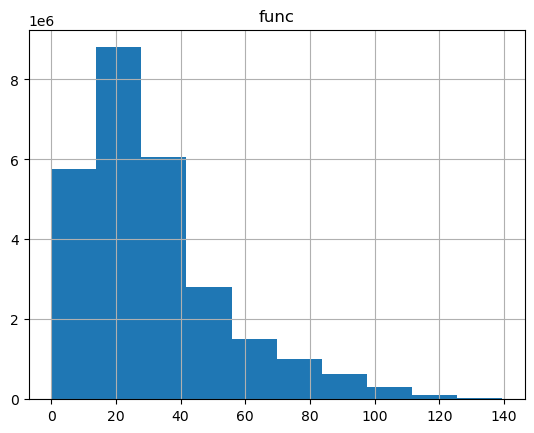

In [5]:
the_df.hist(column="func",bins=10,backend="matplotlib")

In [6]:
input_score = the_df[the_df["func"] <= THREE_SIGMA_THRESHOLD]["func"].to_numpy()

In [7]:
point_coordinates = the_df[the_df["func"] <= THREE_SIGMA_THRESHOLD][["var1","var2","var3"]].to_numpy()

In [8]:
# Somewhat ill-advised, but random downsample
random_subsample_indices = np.random.choice(point_coordinates.shape[0],size=5000,replace=False)
input_score_reduced = input_score[random_subsample_indices]
point_coordinates_reduced = point_coordinates[random_subsample_indices,:]

<IPython.core.display.Javascript object>


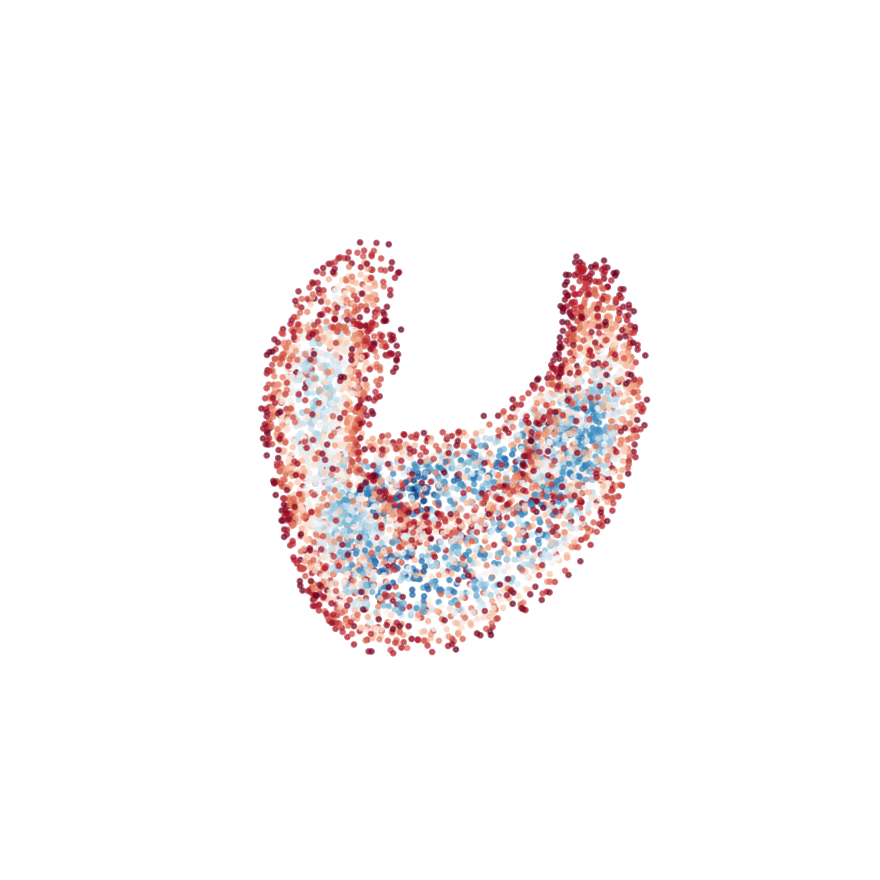

In [9]:
%matplotlib notebook
from mpl_toolkits import mplot3d
plt.figure(figsize=(5,5),dpi=160)
ax = plt.axes(projection="3d")
ax.scatter3D(point_coordinates_reduced[:,0],point_coordinates_reduced[:,1],point_coordinates_reduced[:,2],s=3,alpha=0.60,c=input_score_reduced,cmap="RdBu_r")
#ax.scatter3D(point_coordinates_reduced[:,0],point_coordinates_reduced[:,1],scale(input_score_reduced),s=3,alpha=0.90,c=scale(input_score_reduced),cmap="RdBu_r")
#plt.rcParams["figure.dpi"]=300
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.axis('off')
plt.show()


In [12]:
rdbulist = [
    "rgb(103,0,31)",
    "rgb(178,24,43)",
    "rgb(214,96,77)",
    "rgb(244,165,130)",
    "rgb(253,219,199)",
    "rgb(247,247,247)",
    "rgb(209,229,240)",
    "rgb(146,197,222)",
    "rgb(67,147,195)",
    "rgb(33,102,172)",
    "rgb(5,48,97)"
]
rdbulist = list(reversed(rdbulist))
RdBu = [[i*0.1,rdbulist[i]] for i in range(11)]

In [40]:
mapper = km.KeplerMapper(verbose=1)
from kmapper.plotlyviz import plotlyviz
#cover = km.Cover(n_cubes=8,perc_overlap=0.15)
cover = km.Cover(n_cubes=14,limits=[[0,14.16]])
the_graph = mapper.map(scale(input_score_reduced),point_coordinates_reduced,precomputed=False,clusterer=sklearn.cluster.DBSCAN(eps=3, min_samples=5),cover=cover)

KeplerMapper(verbose=1)
Mapping on data shaped (5000, 3) using lens shaped (5000,)

Creating 14 hypercubes.

Created 10 edges and 11 nodes in 0:00:00.076525.


In [24]:
mapper.visualize(the_graph,path_html="3d_mapper_output.html",colorscale=RdBu,color_values=scale(input_score_reduced),node_color_function="mean",color_function_name="Score")

Wrote visualization to: 3d_mapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh